<a href="https://colab.research.google.com/github/Mandy-cyber/Period-Pride-Ja-NN/blob/main/CategorizeQuestions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -q https://drive.google.com/uc?id=1N2SfnsjdRCw5yXx2DfgfA2ydiltFAgWS&export=download

In [ ]:
import pandas as pd
import string
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, LSTM, SpatialDropout1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn import metrics
import time
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Embedding

nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
#LOADING DATASETS
df_category = pd.read_csv("uc?id=1N2SfnsjdRCw5yXx2DfgfA2ydiltFAgWS")

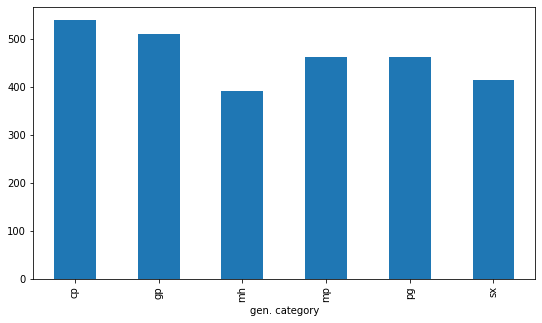

In [ ]:
#VISUALIZING DATA (can be commented out or cell not run)
#We do this to tell how even (or not even) the data in the different categories are
fig = plt.figure(figsize=(9,5))
df_category.groupby('gen. category').headingText.count().plot.bar(ylim=0)
plt.show()

In [ ]:
#PRE-PROCESSING FUCNTIONS
# Needed to make text more easily 'digestible' by the system
stopWords = nltk.corpus.stopwords.words('english') #establishing the stopwords corpus (collection of words)
wn = nltk.WordNetLemmatizer() #using lemmatizer instead of stemming because lemmatizer = more accurate (only downfall is speed)
def clean_up(text):
    noPunctText = "".join([c for c in str(text) if c not in string.punctuation]) #removing punctuation
    tokens = re.split('\W+', str(noPunctText)) #Use the punctuation-free text to split into separate words (tokens)
    noStopWords = [word for word in tokens if word not in stopWords] #remove stop words e.g 'and'
    text_nsw = [each_string.lower() for each_string in noStopWords] #make all the words lowercase
    lem_text = [wn.lemmatize(word) for word in text_nsw] #lemmatize the words (i.e bring the words back to their roots)
    return lem_text

In [ ]:
#APPLYING PRE-PROCESSING FUNCTION TO THE RELEVANT COLUMNS
df_category['headingTextClean'] = df_category['headingText'].apply(clean_up) #apply function
dfCatNew = df_category[['headingTextClean', 'gen. category']] #Creating a new dataframe with only the 2 columns we need
# print(dfCatNew.head())

#TOKENIZING THE TEXTS (splitting into individual words/tokens)
# num_words = 1000
# oov_token = '<UNK>'
# pad_type = 'post'
# trunc_type = 'post'
maxlen = maxlen = max([len(x) for x in dfCatNew['headingTextClean'].values])


# num_words=num_words, oov_token=oov_token
tk = Tokenizer()
tk.fit_on_texts(dfCatNew['headingTextClean'].values)

In [ ]:
#IDENTIFYING THE FEATURES AND THE LABELS
X = tk.texts_to_sequences(dfCatNew['headingTextClean'].values) #converting the features (inputs) to a numpy array
# X = pad_sequences(X) #pads sequences to the same length to avoid mismatch dimension error
X = pad_sequences(X, maxlen=maxlen)
y = pd.get_dummies(dfCatNew['gen. category']).values #giving the labels (outputs) numerical values so the system can understand it

#--------------------------------------------------------------------------------------------------------------------------#
#SPLITTING INTO TESTING & TRAINING DATA
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 5) #Allocating 20% of data to testing, and shuffling order 5 times
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)
# ^^just making sure the dimensions were matching up

#--------------------------------------------------------------------------------------------------------------------------#
#VARS THAT ARE REQUIREMENTS FOR THE EMBEDDING LAYER
MAX_NB_WORDS = 4000 #this variable is not really necessary for our situation but since the model needs it we just assigned a high number
EMBEDDING_DIM = 128   #this value can also be changed, we just used 128 as a default value telling the model what size the vector dimensions should be

MAX_NUM_TOKENS = 5
MAX_SEQUENCE_LENGTH = 10
embedding_layer = Embedding(input_dim=MAX_NUM_TOKENS,
                            output_dim=EMBEDDING_DIM,
                            embeddings_initializer=Constant(128),
                            input_length=MAX_SEQUENCE_LENGTH,mask_zero=True,trainable=False)
#--------------------------------------------------------------------------------------------------------------------------#
#MODEL CONFIGURATION
def create_model():
  model = Sequential() #Using Sequential because our models will each only be fitted with a plain stack of layers (i.e one input only maps to one output)
  #Using an embedding input layer so words with the same meanings are given similar representations, and the vector dimensions are smaller
  model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1])) #input layer
  model.add(SpatialDropout1D(0.2))#We use dropout to prevent overfitting (modelling the training data too well)
  model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2)) 
  model.add(Dense(6, activation='softmax')) #Softmax is the type of activation function
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])# We use categorical_crossentropy because for both datasets as there are two or more possible outputs; Adam optimizer function is the default optimizer used
  return model


model = create_model()
#HYPER-PARAMTERS
epochs = 5 #gave the closest in value for training and testing data
batch_size = 64 #default batch_size
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1) #fitting the model with all its yummy parameters

#--------------------------------------------------------------------------------------------------------------------------#
# #EVALUATION & ACCURACY
accr = model.evaluate(X_test,y_test) #evaluating the model by using the testing data 
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1])) #printing the loss and accuracy values for the testing data (to compare with training data)

model.save('categoryModel.h5')
# model.summary()

In [ ]:
!wget -q https://drive.google.com/uc?id=1So1eQQjY0dgD684_YK_Bi-zeGFJrCjDg&export=download #for gp model
!wget -q https://drive.google.com/uc?id=1eMzdX56TEMe-OE2o3vB95q8PBsYR5N3C&export=download #for mh model
!wget -q https://drive.google.com/uc?id=1QNCllrqgtWt2FTuXjtI_p13rb24bWTmA&export=download #for mp model
!wget -q https://drive.google.com/uc?id=1IYk6cUGNlCSxZ11yv3H1QZJhRq-9l2wl&export=download #for pg model
!wget -q https://drive.google.com/uc?id=1ssfB6OK0OK6kUUhyhv6uqa7q0LYcKD9t&export=download #for sx model
!wget -q https://drive.google.com/uc?id=149lFx__zBTHLEZBSjjeyDfwePD7n61vL&export=download #for cp model

In [ ]:
labels2 = ['gp', 'pg', 'mp', 'mh', 'cp', 'sx'] #for general category
new_question = ["i am depressed by my menstrual cycle"]
seq = tk.texts_to_sequences(new_question)
paddedQuestion = pad_sequences(seq)
pred = model.predict(paddedQuestion)
labels = labels2
genCategory = labels[np.argmax(pred)]
print(genCategory)

if genCategory == "gp":
  subCategoryList = ['cyclelengths', 'discharge', 'generalperiod', 'irregularperiods']
  model = tf.keras.models.load_model("uc?id=1So1eQQjY0dgD684_YK_Bi-zeGFJrCjDg")
  pred = model.predict(paddedQuestion)
  subCategory = subCategoryList[np.argmax(pred)]
  print(subCategory) 

elif genCategory == "pg":
  subCategoryList = ['cyclelengths', 'discharge', 'generalperiod', 'irregularperiods']
  model = tf.keras.models.load_model("uc?id=1IYk6cUGNlCSxZ11yv3H1QZJhRq-9l2wl")
  pred = model.predict(paddedQuestion)
  subCategory = subCategoryList[np.argmax(pred)]
  print(subCategory) 

elif genCategory == "mp":
  subCategoryList = ['howtouse', 'symptoms']
  model = tf.keras.models.load_model("uc?id=1QNCllrqgtWt2FTuXjtI_p13rb24bWTmA")
  pred = model.predict(paddedQuestion)
  subCategory = subCategoryList[np.argmax(pred)]
  print(subCategory) 

elif genCategory == "mh":
  subCategoryList = ['gmentalhealth', 'howtomanage']
  model = tf.keras.models.load_model("uc?id=1eMzdX56TEMe-OE2o3vB95q8PBsYR5N3C")
  pred = model.predict(paddedQuestion)
  subCategory = subCategoryList[np.argmax(pred)]
  print(subCategory) 

elif genCategory == "cp":
  subCategoryList = ['iud', 'morningafterpill', 'birthcontrolpill', 'gcontra', 'condoms']
  model = tf.keras.models.load_model("uc?id=149lFx__zBTHLEZBSjjeyDfwePD7n61vL")
  pred = model.predict(paddedQuestion)
  subCategory = subCategoryList[np.argmax(pred)]
  print(subCategory) 

else:
  subCategoryList = ['basics', 'bleeding', 'orgasm', 'toysandmastandporn']
  model = tf.keras.models.load_model("uc?id=1ssfB6OK0OK6kUUhyhv6uqa7q0LYcKD9t")
  pred = model.predict(paddedQuestion)
  subCategory = subCategoryList[np.argmax(pred)]
  print(subCategory) 

